# **Aula 02 - Parte1 - Análise Gráfica**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("basefibrose.csv", encoding='latin1', sep = ";", decimal = ",")

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        107 non-null    int64  
 1   Sexo                      107 non-null    object 
 2   Etnia                     107 non-null    object 
 3   Idade                     107 non-null    int64  
 4   IMC                       107 non-null    float64
 5   Circuferenciaa_Abdominal  107 non-null    int64  
 6   GRAU_FIBROSE              107 non-null    object 
 7   Fibroscan                 107 non-null    float64
 8   Fibroscan.IQR             107 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 7.6+ KB


In [21]:
df.head()

ID       Sexo            Etnia  Idade   IMC  Circuferenciaa_Abdominal  \
0   1  Masculino       caucasiana     63  22.2                        98   
1   2  Masculino       caucasiana     59  26.7                       101   
2   3  Masculino  afrodescendente     45  25.2                        92   
3   4  Masculino       caucasiana     30  18.5                        72   
4   5   Feminino       caucasiana     56  21.2                        90   

  GRAU_FIBROSE  Fibroscan  Fibroscan.IQR  
0           F1        6.3             10  
1           F2        7.7             13  
2           F0        4.8             25  
3           F2        9.5             13  
4           F1        6.4             30

# **Medidas de resumo por grau de fibrose**

In [22]:
df.groupby(["GRAU_FIBROSE"]).describe()

ID                                                        \
             count       mean        std   min   25%   50%    75%    max   
GRAU_FIBROSE                                                               
F0             8.0  42.125000  29.526925   3.0  18.0  45.5  66.75   80.0   
F1            43.0  48.558140  29.015843   1.0  28.5  47.0  66.00  107.0   
F2            31.0  52.451613  33.725202   2.0  22.0  56.0  83.00  102.0   
F3            23.0  69.521739  28.765304  14.0  48.0  74.0  91.00  106.0   
F4             2.0  64.000000   8.485281  58.0  61.0  64.0  67.00   70.0   

             Idade             ... Fibroscan       Fibroscan.IQR             \
             count       mean  ...       75%   max         count       mean   
GRAU_FIBROSE                   ...                                            
F0             8.0  40.625000  ...     4.725   5.0           8.0  13.750000   
F1            43.0  44.813953  ...     6.100   9.3          43.0  14.790698   
F2            31.0  49.903226  ...     8.800  20.6          31.0  15.548387   
F3            23.0  53.826087  ...    10.550  27.7          23.0  15.347826   
F4             2.0  56.500000  ...    33.975  36.3           2.0  16.500000   

                                                        
                   std   min    25%   50%    75%   max  
GRAU_FIBROSE                                            
F0            6.519202   7.0   7.75  14.0  17.25  25.0  
F1            7.265568   3.0   9.00  12.0  19.50  30.0  
F2            5.852855   5.0  12.00  15.0  19.00  28.0  
F3            6.485009   4.0  11.50  15.0  19.50  27.0  
F4            0.707107  16.0  16.25  16.5  16.75  17.0  

[5 rows x 48 columns]

# **Frequências da variável grau de Fibrose**

In [23]:
frequencia = df['GRAU_FIBROSE'].value_counts()
percentual = np.round(df['GRAU_FIBROSE'].value_counts(normalize = True) * 100, 2)

In [24]:
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia,
                                       'Porcentagem(%)': percentual})

In [25]:
dist_freq_qualitativas.rename_axis('GRAU FIBROSE', axis = 'columns', inplace = True)

In [26]:
dist_freq_qualitativas

GRAU FIBROSE  Frequência  Porcentagem(%)
GRAU_FIBROSE                            
F1                    43           40.19
F2                    31           28.97
F3                    23           21.50
F0                     8            7.48
F4                     2            1.87

# **Histograma**

In [28]:
sns.histplot(x = 'Fibroscan', bins = 10, data = df)

<Axes: xlabel='Fibroscan', ylabel='Count'>

In [31]:
sns.boxplot(x = 'Fibroscan' ,  data = df)

<Axes: xlabel='Fibroscan'>

# **Box-plot do Fibroscan por Grau de Fibrose**

In [29]:
sns.boxplot(x = 'GRAU_FIBROSE', y = 'Fibroscan' ,  data = df, order = ['F0', 'F1', 'F2', 'F3', 'F4'])

<Axes: xlabel='GRAU_FIBROSE', ylabel='Fibroscan'>

# **Gráfico de barras**

In [ ]:
df_bar = df.groupby(['Sexo'])['GRAU_FIBROSE'].value_counts(normalize=True).rename('proportion').reset_index()

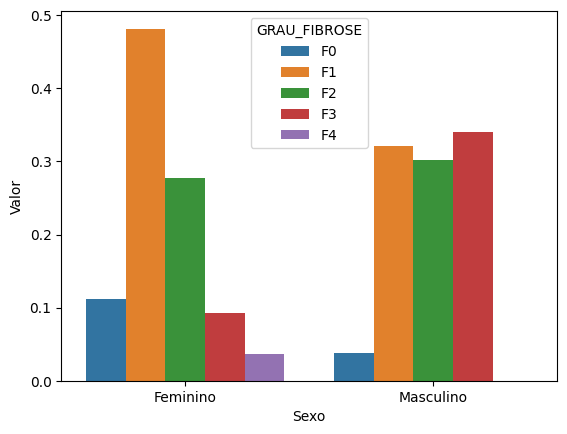

In [ ]:
sns.barplot(x='Sexo', y='proportion', hue='GRAU_FIBROSE', data = df_bar, hue_order = ['F0', 'F1', 'F2', 'F3', 'F4'])
plt.ylabel('Valor')
plt.show()